<a href="https://colab.research.google.com/github/SoonchanGwon/FB_Prophet/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%98%88%EC%B8%A1_%EB%B6%84%EC%84%9D(fbprophet).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석, 시각화, 예측 라이브러리 불러오기
<!--
# 라이브러리 설치 #
(ict36) PS C:\worksp> conda install pandas
(ict36) PS C:\worksp> conda install numpy
(ict36) PS C:\worksp> conda install matplotlib
(ict36) PS C:\worksp> conda install beauitfulsoup4

(ict36) PS C:\worksp> conda install –c conda-forge fbprophet
(ict36) PS C:\worksp> conda install –c conda-forge pystan
(ict36) PS C:\worksp> conda install plotly
-->

In [2]:
# 판다스, 넘파이, 맷플롭립, 뷰티풀숲, 플로틀리 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

import plotly.graph_objs as go
import plotly.offline as py

In [3]:
# 시계열 예측 라이브러리 
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

# 데이터 수집 및 읽기

* https://www.kaggle.com/thaile1001/corona0221202
* https://github.com/owid/covid-19-data
* https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv
* 코로나19 전세계 지역별 확진자, 회복자, 사망자 데이터

In [4]:
# 데이터 읽기 
# url = 'https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv'
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
df = pd.read_csv(url, error_bad_lines=False)

# df = pd.read_csv('./02-21-2020.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [5]:
# 열이름 추출
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79277 entries, 0 to 79276
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               79277 non-null  object 
 1   continent                              75409 non-null  object 
 2   location                               79277 non-null  object 
 3   date                                   79277 non-null  object 
 4   total_cases                            77699 non-null  float64
 5   new_cases                              77697 non-null  float64
 6   new_cases_smoothed                     76696 non-null  float64
 7   total_deaths                           68270 non-null  float64
 8   new_deaths                             68428 non-null  float64
 9   new_deaths_smoothed                    76696 non-null  float64
 10  total_cases_per_million                77277 non-null  float64
 11  ne

In [9]:
# 한국 확진자수 데이터 추출
df_korea = df[df['location'] == 'South Korea']
df_korea.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
66204,KOR,Asia,South Korea,2020-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,0.0,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,51269183.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.916
66205,KOR,Asia,South Korea,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,0.020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,16.0,0.0,0.0,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,51269183.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.916
66206,KOR,Asia,South Korea,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,0.020,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,51269183.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.916
66207,KOR,Asia,South Korea,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,0.039,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,0.0,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,51269183.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.916
66208,KOR,Asia,South Korea,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,0.039,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,51269183.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.916


In [11]:
# 한국 확진자수 데이터프레임 생성
df_korea1 = df_korea.T[3:]
df_korea1.head()

,66204,66205,66206,66207,66208,66209,66210,66211,66212,66213,66214,66215,66216,66217,66218,66219,66220,66221,66222,66223,66224,66225,66226,66227,66228,66229,66230,66231,66232,66233,66234,66235,66236,66237,66238,66239,66240,66241,66242,66243,...,66603,66604,66605,66606,66607,66608,66609,66610,66611,66612,66613,66614,66615,66616,66617,66618,66619,66620,66621,66622,66623,66624,66625,66626,66627,66628,66629,66630,66631,66632,66633,66634,66635,66636,66637,66638,66639,66640,66641,66642
date,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,...,2021-02-23,2021-02-24,2021-02-25,2021-02-26,2021-02-27,2021-02-28,2021-03-01,2021-03-02,2021-03-03,2021-03-04,2021-03-05,2021-03-06,2021-03-07,2021-03-08,2021-03-09,2021-03-10,2021-03-11,2021-03-12,2021-03-13,2021-03-14,2021-03-15,2021-03-16,2021-03-17,2021-03-18,2021-03-19,2021-03-20,2021-03-21,2021-03-22,2021-03-23,2021-03-24,2021-03-25,2021-03-26,2021-03-27,2021-03-28,2021-03-29,2021-03-30,2021-03-31,2021-04-01,2021-04-02,2021-04-03
total_cases,NaN,1,1,2,2,3,4,4,4,4,11,12,15,15,16,19,23,24,24,25,27,28,28,28,28,28,29,30,31,31,104,204,433,602,833,977,1261,1766,2337,3150,...,88120,88516,88922,89321,89676,90031,90372,90816,91240,91638,92055,92471,92817,93263,93733,94198,94686,95176,95635,96017,96380,96849,97294,97757,98209,98665,99075,99421,99846,100276,100770,101275,101757,102141,102582,103088,103639,104194,104736,105279
new_cases,NaN,NaN,0,1,0,1,1,0,0,0,7,1,3,0,1,3,4,1,0,1,2,1,0,0,0,0,1,1,1,0,73,100,229,169,231,144,284,505,571,813,...,439,396,406,399,355,355,341,444,424,398,417,416,346,446,470,465,488,490,459,382,363,469,445,463,452,456,410,346,425,430,494,505,482,384,441,506,551,555,542,543
new_cases_smoothed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.429,0.429,0.429,1.286,1.429,1.714,1.571,1.714,2.143,2.714,1.857,1.714,1.429,1.714,1.714,1.286,0.714,0.571,0.571,0.571,0.429,0.429,0.429,10.857,25.143,57.857,81.857,114.714,135.143,175.714,237.429,304.714,388.143,...,453.429,421.286,399.143,392.429,383.429,386.714,384.429,385.143,389.143,388,390.571,399.286,398,413,416.714,422.571,435.429,445.857,452,457.143,445.286,445.143,442.286,438.714,433.286,432.857,436.857,434.429,428.143,426,430.429,438,441.714,438,451.571,463.143,480.429,489.143,494.429,503.143
total_deaths,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,2,6,8,10,12,13,13,16,...,1576,1581,1585,1595,1603,1605,1606,1612,1619,1627,1632,1634,1642,1645,1648,1652,1662,1667,1669,1675,1678,1686,1688,1690,1693,1696,1697,1704,1707,1709,1716,1721,1722,1726,1729,1731,1735,1737,1740,1744


In [12]:
# 한국의 확진자 시계열 데이터
# df_korea = df_korea.reset_index().rename(columns={'index': 'Date', 33: 'Confirmed'})
# df_korea['Date'] = pd.to_datetime(df_korea['Date'])

# # 데이터 추가할 경우
# df_korea = df_korea.append([
#     {'date': pd.to_datetime('2020-11-25'), 'confirmed': 433},
#     {'date': pd.to_datetime('2020-11-26'), 'confirmed': 602},
#     ], ignore_index=True)

df_korea.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
66638,KOR,Asia,South Korea,2021-03-30,103088.0,506.0,463.143,1731.0,2.0,3.429,2010.721,9.869,9.034,33.763,0.039,0.067,1.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48182.0,7585575.0,147.956,0.940,40680.0,0.793,0.011,87.8,people tested,860387.0,852202.0,8185.0,31788.0,22182.0,1.68,1.66,0.02,433.0,NaN,51269183.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.916
66639,KOR,Asia,South Korea,2021-03-31,103639.0,551.0,480.429,1735.0,4.0,3.714,2021.468,10.747,9.371,33.841,0.078,0.072,1.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50923.0,7636498.0,148.949,0.993,40950.0,0.799,0.012,85.2,people tested,889546.0,876573.0,12973.0,29159.0,21962.0,1.74,1.71,0.03,428.0,NaN,51269183.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.916
66640,KOR,Asia,South Korea,2021-04-01,104194.0,555.0,489.143,1737.0,2.0,3.000,2032.293,10.825,9.541,33.880,0.039,0.059,1.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42146.0,7678644.0,149.771,0.822,39967.0,0.780,0.012,81.7,people tested,933924.0,914069.0,19855.0,44378.0,23234.0,1.82,1.78,0.04,453.0,NaN,51269183.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.916
66641,KOR,Asia,South Korea,2021-04-02,104736.0,542.0,494.429,1740.0,3.0,2.714,2042.865,10.572,9.644,33.939,0.059,0.053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38899.0,7717543.0,150.530,0.759,37936.0,0.740,NaN,NaN,people tested,979936.0,953556.0,26380.0,46012.0,26061.0,1.91,1.86,0.05,508.0,NaN,51269183.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.916
66642,KOR,Asia,South Korea,2021-04-03,105279.0,543.0,503.143,1744.0,4.0,3.143,2053.456,10.591,9.814,34.017,0.078,0.061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,989381.0,962083.0,27298.0,9445.0,27184.0,1.93,1.88,0.05,530.0,NaN,51269183.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.916


# Plotly 데이터 시각화
(참고) https://wooiljeong.github.io/python/python_plotly/

In [20]:
# 한국 코로나 확진자 그래프
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=df_korea.date,
        y=df_korea.new_cases        
    )
)
fig

# Prophet 예측 분석

In [21]:
# Facebook Prophet 예측 모델 데이터프레임 생성
# 날짜 -> ds, data -> y
df_prophet = df_korea.rename(columns={
    'date': 'ds',
    'new_cases': 'y'
})

df_prophet.tail()

,iso_code,continent,location,ds,total_cases,y,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
66638,KOR,Asia,South Korea,2021-03-30,103088.0,506.0,463.143,1731.0,2.0,3.429,2010.721,9.869,9.034,33.763,0.039,0.067,1.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48182.0,7585575.0,147.956,0.940,40680.0,0.793,0.011,87.8,people tested,860387.0,852202.0,8185.0,31788.0,22182.0,1.68,1.66,0.02,433.0,NaN,51269183.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.916
66639,KOR,Asia,South Korea,2021-03-31,103639.0,551.0,480.429,1735.0,4.0,3.714,2021.468,10.747,9.371,33.841,0.078,0.072,1.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50923.0,7636498.0,148.949,0.993,40950.0,0.799,0.012,85.2,people tested,889546.0,876573.0,12973.0,29159.0,21962.0,1.74,1.71,0.03,428.0,NaN,51269183.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.916
66640,KOR,Asia,South Korea,2021-04-01,104194.0,555.0,489.143,1737.0,2.0,3.000,2032.293,10.825,9.541,33.880,0.039,0.059,1.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42146.0,7678644.0,149.771,0.822,39967.0,0.780,0.012,81.7,people tested,933924.0,914069.0,19855.0,44378.0,23234.0,1.82,1.78,0.04,453.0,NaN,51269183.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.916
66641,KOR,Asia,South Korea,2021-04-02,104736.0,542.0,494.429,1740.0,3.0,2.714,2042.865,10.572,9.644,33.939,0.059,0.053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38899.0,7717543.0,150.530,0.759,37936.0,0.740,NaN,NaN,people tested,979936.0,953556.0,26380.0,46012.0,26061.0,1.91,1.86,0.05,508.0,NaN,51269183.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.916
66642,KOR,Asia,South Korea,2021-04-03,105279.0,543.0,503.143,1744.0,4.0,3.143,2053.456,10.591,9.814,34.017,0.078,0.061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,989381.0,962083.0,27298.0,9445.0,27184.0,1.93,1.88,0.05,530.0,NaN,51269183.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.916


# Prophet 예측 모델 생성(1)

In [22]:
# Prophet 모델 

m = Prophet(  
    yearly_seasonality=False,   # 연별 분석
    weekly_seasonality=False,   # 주별 분석 
    daily_seasonality=True,     # 일별 분석
    seasonality_mode='additive' # 누적
)

# 모델 학습
m.fit(df_prophet)

# 예측 구간
future = m.make_future_dataframe(periods=7)
future.tail(7)


,ds
439,2021-04-04
440,2021-04-05
441,2021-04-06
442,2021-04-07
443,2021-04-08
444,2021-04-09
445,2021-04-10


In [23]:
# 예측 분석
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(7) # 날짜, 예측값, 오차 예측 최소값, 오차 예측 최대값

,ds,yhat,yhat_lower,yhat_upper
439,2021-04-04,519.490285,289.595502,744.193646
440,2021-04-05,519.847915,287.605114,753.158040
441,2021-04-06,520.205545,306.803403,760.941929
442,2021-04-07,520.563175,288.689113,734.619145
443,2021-04-08,520.920805,293.383952,747.097767
444,2021-04-09,521.278436,290.476479,745.875782
445,2021-04-10,521.636066,293.919006,747.858338


In [24]:
# 그래프
fig = plot_plotly(m, forecast)
py.iplot(fig)

# Prophet 예측 모델 생성 (2)
- 체인지포인트 추가
- (참고사이트1) https://hyperconnect.github.io/2020/03/09/prophet-package.html
- (참고사이트2) https://facebook.github.io/prophet/docs/trend_changepoints.html

In [25]:
# Prophet 모델 

m = Prophet(
    changepoint_prior_scale=0.2, # 디폴트값 = 0.05
    changepoint_range=0.98,      
    yearly_seasonality=False,   
    weekly_seasonality=False,    
    daily_seasonality=True,     
    seasonality_mode='additive' 
)
# 모델 학습
m.fit(df_prophet)

# 예측 구간
future = m.make_future_dataframe(periods=7)
future.tail(7)

# 예측 분석
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(7) 

# 그래프
fig = plot_plotly(m, forecast)
py.iplot(fig)

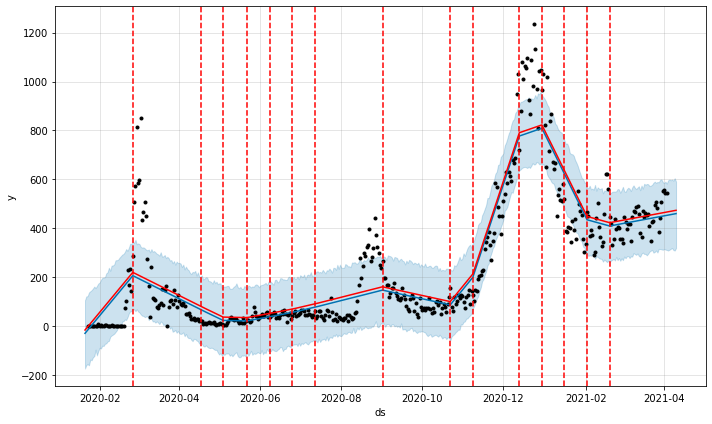

In [26]:
# 체인지 포인트 그래프
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)